In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import collections
from scipy.ndimage.interpolation import zoom
import cPickle as pickle

import scipy.io.wavfile
import collections
import wavio

import sys, os
sys.path.append(os.path.expanduser('~/projects/engaged_hackathon/'))
from engaged.features import frequency

In [5]:
import pandas as pd

base_path = '/media/michael/Seagate/urban8k/'
meta_path = base_path + 'UrbanSound8K/metadata/UrbanSound8K.csv'

unique_labels = [''] * 10

# data = 
data = pd.read_csv(meta_path)
for row in data.iterrows():
    unique_labels[row[1]['classID']] = row[1]['class']
# print data
print unique_labels 

['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']


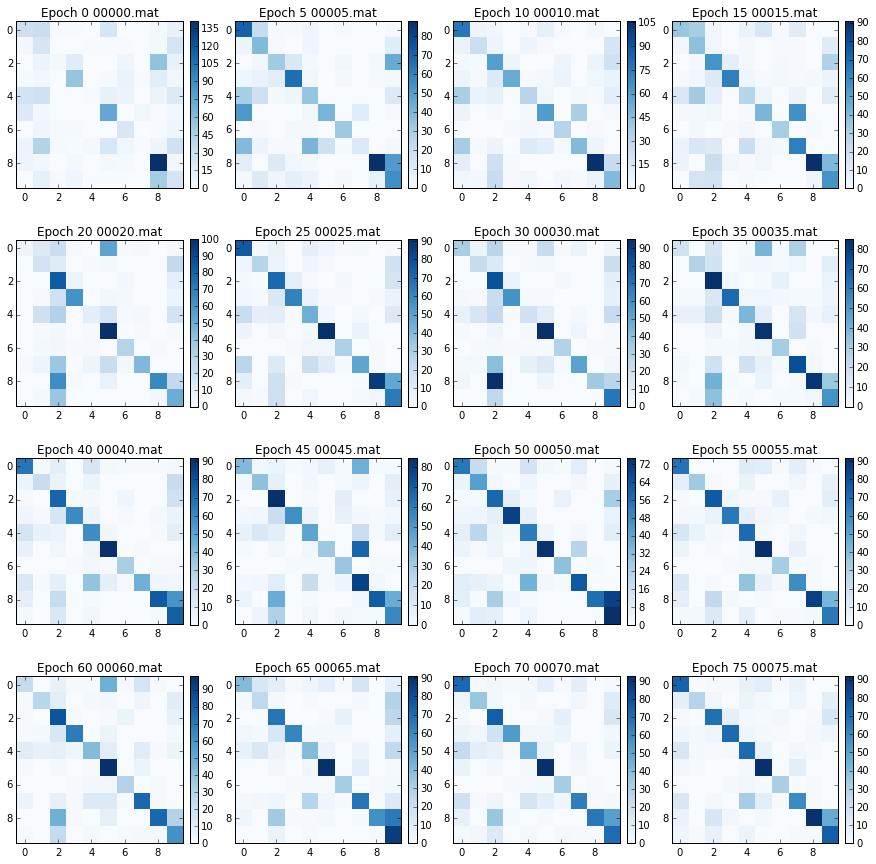

In [81]:
import scipy.io


plt.figure(figsize=(15, 15))
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
#     tick_marks = np.arange(len(unique_labels))
#     plt.xticks(tick_marks, unique_labels, rotation=75)

#     plt.yticks(tick_marks, unique_labels)
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
num = 0
for count in range(0, 200, 5):

    if num +1 > 16:
        break
    fname = '%05d.mat' % count
    cm = scipy.io.loadmat('conf_mat/' + fname)
    plt.subplot(4, 4, num+1)
    num += 1
    plot_confusion_matrix(cm['cm'] ,title='Epoch ' + str(count) + ' ' + fname)

In [67]:
print (np.eye(10) * cm['cm']).sum()
print cm['cm'].sum()
print cm['cm']

463.0
924
[[50  3  0  0 16 19  1  0  0 11]
 [ 0 38  0  0  1  0  0  1  0  3]
 [ 4  3 25  8 13  0  0  0  5 42]
 [ 8  2  9 63  7  0  0  1  3  7]
 [11 10  0  0 76  1  0  0  0  2]
 [41  2  0  1 20 30  1 11  0  1]
 [ 2  0  0  2  0  0 31  0  0  1]
 [ 9  2  0  0 75  2  0 30  0  2]
 [23  1  0  0  9  0  0  0 62 24]
 [ 5 25  1  0  8  0  0  0  2 58]]


In [70]:
cm = scipy.io.loadmat('conf_mat/' + '%05d.mat' % 68)
print cm['cm']
print (np.eye(10) * cm['cm']).sum()
print cm['cm'].sum()

[[ 78   1   4   0   8   1   1   6   0   1]
 [  4  42   3   0   3   0   1   3   0   3]
 [  2   0  82   1   3   0   5   0   0   7]
 [  3   3   9  68   5   2   2   0   1   1]
 [ 18   8   2   1  63   5   0   2   1   0]
 [  9   0   1   0   0  63   0  34   0   0]
 [  0   0   0   2   3   0  32   0   1   0]
 [ 19   0   4   0  29   3   2  60   3   0]
 [  8   0  25   2   0   0   0   0 103  26]
 [  4   3  18   0   2   0   1   1   2  63]]
654.0
976
